In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("/Users/ysc/Desktop/imcProsperity/round0.csv", sep=';')

In [5]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.000000
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.000000
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,2.000000
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,1.925293
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,2.134766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-2,199700,AMETHYSTS,9998,8,9996.0,2.0,9995.0,25.0,10004,2,10005.0,25.0,NaN,NaN,10001.0,-48.000000
3996,-2,199800,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,21,NaN,NaN,NaN,NaN,4952.5,904.429688
3997,-2,199800,AMETHYSTS,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,-48.000000
3998,-2,199900,STARFRUIT,4950,32,NaN,NaN,NaN,NaN,4954,7,4956.0,32.0,NaN,NaN,4952.0,900.953125


In [47]:
df_sf = df[df['product'] == "STARFRUIT"]
df_sf[df_sf.isna()] = 0

In [48]:
def wavg_price(df):
    
    tmp = df.copy()
    total_volume = tmp[['bid_volume_1', 'bid_volume_2', 'bid_volume_3', 'ask_volume_1', 'ask_volume_2', 'ask_volume_3']].sum(axis=1, skipna=True)

    res = 0
    for i in (1, 2, 3):
        for d in ('bid', 'ask'):
            res += tmp[f'{d}_price_{i}'] * tmp[f'{d}_volume_{i}'] / total_volume

    return res

In [65]:
df_sf

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,0.0,0.0,5003,31,0.0,0.0,0.0,0.0,5002.5,0.000000
3,-2,100,STARFRUIT,4997,24,0.0,0.0,0.0,0.0,5003,2,5004.0,22.0,0.0,0.0,5000.0,1.925293
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,0.0,0.0,5003,20,0.0,0.0,0.0,0.0,5000.0,2.134766
7,-2,300,STARFRUIT,4996,31,0.0,0.0,0.0,0.0,5003,31,0.0,0.0,0.0,0.0,4999.5,-3.100586
9,-2,400,STARFRUIT,4995,27,0.0,0.0,0.0,0.0,5002,27,0.0,0.0,0.0,0.0,4998.5,-0.179688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-2,199500,STARFRUIT,4949,23,0.0,0.0,0.0,0.0,4956,23,0.0,0.0,0.0,0.0,4952.5,908.226562
3993,-2,199600,STARFRUIT,4949,22,0.0,0.0,0.0,0.0,4956,22,0.0,0.0,0.0,0.0,4952.5,911.500000
3994,-2,199700,STARFRUIT,4949,27,0.0,0.0,0.0,0.0,4956,27,0.0,0.0,0.0,0.0,4952.5,910.929688
3996,-2,199800,STARFRUIT,4949,21,0.0,0.0,0.0,0.0,4956,21,0.0,0.0,0.0,0.0,4952.5,904.429688


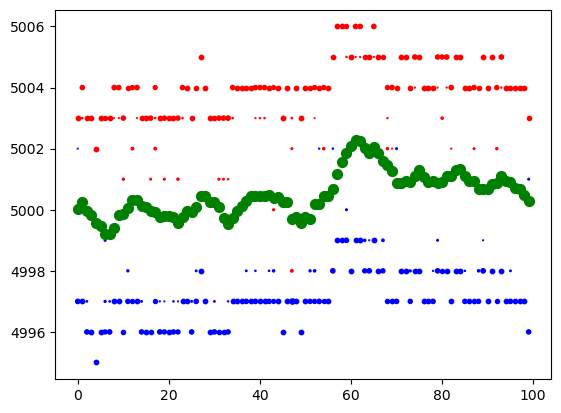

In [69]:
price_history = []
window_size = 5
all = 0

for _, row in df_sf.iloc[:100, :].iterrows():
    
    idx = row['timestamp'] // 100

    wavg_price = 0

    ys, ws = [], []
    total_volume = row[['bid_volume_1', 'bid_volume_2', 'bid_volume_3', 'ask_volume_1', 'ask_volume_2', 'ask_volume_3']].sum()
    
    for i in (1, 2, 3):
        if row[f'bid_price_{i}'] != 0:
            ys += [row[f'bid_price_{i}']]
            ws += [20 * row[f'bid_volume_{i}'] / total_volume ]
            wavg_price += row[f'bid_price_{i}'] * row[f'bid_volume_{i}'] / total_volume
    xs = [idx] * len(ys)
    plt.scatter(xs, ys, c='blue', s=ws)

    ys, ws = [], []
    for i in (1, 2, 3):
        if row[f'ask_price_{i}'] != 0:
            ys += [row[f'ask_price_{i}']]
            ws += [20 * row[f'ask_volume_{i}'] / total_volume ]
            wavg_price += row[f'ask_price_{i}'] * row[f'ask_volume_{i}'] / total_volume
    xs = [idx] * len(ys)
    plt.scatter(xs, ys, c='red', s=ws)

    price_history.append(wavg_price)

    if idx < window_size :
        all += price_history[-1]
        ma = all / (idx + 1)
    else:
        all = all - price_history[idx - window_size] + price_history[-1]
        ma = all / window_size 

    plt.scatter(idx, ma, c='green', s=50)
    
    

In [41]:
df_sf

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,0.0,0.0,5003,31,0.0,0.0,0.0,0.0,5002.5,0.000000
3,-2,100,STARFRUIT,4997,24,0.0,0.0,0.0,0.0,5003,2,5004.0,22.0,0.0,0.0,5000.0,1.925293
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,0.0,0.0,5003,20,0.0,0.0,0.0,0.0,5000.0,2.134766
7,-2,300,STARFRUIT,4996,31,0.0,0.0,0.0,0.0,5003,31,0.0,0.0,0.0,0.0,4999.5,-3.100586
9,-2,400,STARFRUIT,4995,27,0.0,0.0,0.0,0.0,5002,27,0.0,0.0,0.0,0.0,4998.5,-0.179688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-2,199500,STARFRUIT,4949,23,0.0,0.0,0.0,0.0,4956,23,0.0,0.0,0.0,0.0,4952.5,908.226562
3993,-2,199600,STARFRUIT,4949,22,0.0,0.0,0.0,0.0,4956,22,0.0,0.0,0.0,0.0,4952.5,911.500000
3994,-2,199700,STARFRUIT,4949,27,0.0,0.0,0.0,0.0,4956,27,0.0,0.0,0.0,0.0,4952.5,910.929688
3996,-2,199800,STARFRUIT,4949,21,0.0,0.0,0.0,0.0,4956,21,0.0,0.0,0.0,0.0,4952.5,904.429688


In [4]:
import datamodel
import logging

In [71]:
class Trader:

    def run(self, state):
        pass

In [34]:
class Simulator:

    def __init__(self, scenario_path):

        logging.basicConfig(format='%(message)s', level=logging.INFO)

        self.df = pd.read_csv(scenario_path, sep=';')
        self.product = self.df['product'].unique().tolist()

        self.traderdata = ""
        self.timestamp = sorted(self.df['timestamp'].unique())
        self.order_depths_ = dict()
        self.own_trades_ = dict()
        self.listings_ = dict()
        self.market_trades_ = dict()
        self.position_ = {p: 0 for p in self.product}
        self.observations_ = dict() 
        self.pnl = 0


    def _clear(self):
        self.order_depths_.clear()
        self.own_trades_.clear()
        self.listings_.clear()
        self.market_trades_.clear()
        self.observations_.clear() 


    def _settle(self, orders, timestamp):

        for product in self.product:

            if product in orders:
                
                order_depth = self.order_depths_[product]
                order = orders[product]

                sorted_buy_orders = sorted(order_depth.buy_orders.items(), reverse=True)
                sorted_sell_orders = sorted(order_depth.sell_orders.items(), reverse=False)

                for o in order:
                    price, quantity = o.price, o.quantity

                    if quantity > 0:
                        for p, vol in sorted_sell_orders:
                            if p <= price and quantity > 0:
                                done = min(quantity, abs(vol))
                                quantity -= done
                                self.position_[product] += done
                                if product not in self.own_trades_:
                                    self.own_trades_[product] = [datamodel.Trade(product, p, done, self.traderdata, "", timestamp)]
                                else:
                                    self.own_trades_[product].append(datamodel.Trade(product, p, done, self.traderdata, "", timestamp))
                                logging.info(f"{timestamp:>6}  --->   Buy {done:>5} {product:>10} at {p:>6}")


                    elif quantity < 0:
                        for p, vol in sorted_buy_orders:
                            if p >= price and quantity < 0:
                                done = min(abs(quantity), vol)
                                quantity += done
                                self.position_[product] -= done
                                if product not in self.own_trades_:
                                    self.own_trades_[product] = [datamodel.Trade(product, p, -done, "", self.traderdata, timestamp)]
                                else:
                                    self.own_trades_[product].append(datamodel.Trade(product, p, -done, "", self.traderdata, timestamp))
                                logging.info(f"{timestamp:>6}  --->  Sell {done:>5} {product:>10} at {p:>6}")




    def simulate(self, Trader):

        for timestamp_ in self.timestamp:
            
            self._clear()

            tmp = self.df[self.df['timestamp'] == timestamp_]
            for _, row in tmp.iterrows():
                
                product_ = row['product']
                self.listings_[product_] = datamodel.Listing(product_, product_, 'SEASHELLS')
                self.order_depths_[product_] = datamodel.OrderDepth()

                dict_ = dict()
                for i in (1, 2, 3):
                    if row[f'bid_volume_{i}'] != 0:
                        dict_[row[f'bid_price_{i}']] = row[f'bid_volume_{i}']
                self.order_depths_[product_].buy_orders = dict_
                
                dict_ = dict()
                for i in (1, 2, 3):
                    if row[f'ask_volume_{i}'] != 0:
                        dict_[row[f'ask_price_{i}']] = -row[f'ask_volume_{i}']
                self.order_depths_[product_].sell_orders = dict_

            tradingstate_ = datamodel.TradingState("", timestamp_, self.listings_, self.order_depths_, self.own_trades_, self.market_trades_, self.position_, self.observations_)

            orders, _, name = Trader.run(tradingstate_)

            self._settle(orders, timestamp_)




In [35]:
from datamodel import OrderDepth, UserId, TradingState, Order
from typing import List
import string


class Trader:

    LIMIT = {
        'AMETHYSTS': 20,
        'STARFRUIT': 20
    }

    price_history = dict()
    ma_window_size = 5
    current_sum = 0

    def run(self, state: TradingState):

        result = {}

        for product in state.order_depths:

            current_position = state.position.get(product, 0)
            orders = []

            sell_capacity = - self.LIMIT[product] - current_position
            buy_capacity = self.LIMIT[product] - current_position

            if product == "AMETHYSTS":

                if sell_capacity < 0:
                    orders.append(Order(product, 10001, sell_capacity))
                if buy_capacity > 0:
                    orders.append(Order(product, 9999, buy_capacity))

            # if product == "STARFRUIT":
            #
            #     order_depth = state.order_depths[product]
            #     sorted_buy_orders = sorted(order_depth.buy_orders.items(), reverse=True)
            #     print(sorted_buy_orders)

            #     sorted_sell_orders = sorted(order_depth.sell_orders.items(), reverse=False)
            #     total_volume = 0
            #     wavg_price = 0
            #
            #     for p, vol in sorted_buy_orders:
            #         wavg_price = p * vol
            #         total_volume += vol
            #     for p, vol in sorted_sell_orders:
            #         wavg_price = p * vol
            #         total_volume += vol
            #
            #     wavg_price /= total_volume
            #     self.price_history.append(wavg_price)
            #
            #     idx = state.timestamp // 100
            #     if idx < self.ma_window_size:
            #         self.current_sum += self.price_history[-1]
            #         mp = self.current_sum / (idx + 1)
            #     else:
            #         self.current_sum += self.price_history[-1] - self.price_history[idx - self.ma_window_size]
            #         mp = self.current_sum / self.ma_window_size
            #
            #     orders.append(Order(product, mp + 1, sell_capacity))
            #     orders.append(Order(product, mp - 1, buy_capacity))

            result[product] = orders

        return result, None, "Taeja"

In [36]:
simulator = Simulator(r"/Users/ysc/Desktop/imcProsperity/round0.csv")

In [37]:
trader1 = Trader()

In [38]:
simulator.simulate(trader1)

     0  --->  Sell     1  AMETHYSTS at  10002
  1200  --->   Buy     1  AMETHYSTS at   9998
  1300  --->  Sell     1  AMETHYSTS at  10002
  1800  --->  Sell     1  AMETHYSTS at  10002
  2000  --->   Buy     1  AMETHYSTS at   9998
  3600  --->   Buy     4  AMETHYSTS at   9998
  3700  --->  Sell     1  AMETHYSTS at  10002
  4300  --->   Buy     1  AMETHYSTS at   9998
  6500  --->   Buy     1  AMETHYSTS at   9998
  7300  --->  Sell     1  AMETHYSTS at  10002
  8800  --->   Buy     1  AMETHYSTS at   9998
 10400  --->  Sell     1  AMETHYSTS at  10002
 12000  --->  Sell     1  AMETHYSTS at  10002
 13000  --->  Sell     1  AMETHYSTS at  10002
 13700  --->   Buy     4  AMETHYSTS at   9998
 15400  --->   Buy     1  AMETHYSTS at   9998
 15500  --->  Sell     1  AMETHYSTS at  10002
 15700  --->  Sell     5  AMETHYSTS at  10002
 16200  --->   Buy     1  AMETHYSTS at   9998
 16700  --->  Sell     1  AMETHYSTS at  10002
 18600  --->  Sell     1  AMETHYSTS at  10002
 19200  --->   Buy     1  AMETHYST